In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('./merge_path_defect.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,...,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path,Defect
0,0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,...,6.000012e+17,30795.934,103.433,854.0,154,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111,0
1,1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,...,6.000008e+17,32135.618,105.552,895.0,156,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122,0
2,2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,...,5.999989e+17,31057.895,102.598,898.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133,0
3,3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,...,5.999997e+17,32140.566,102.963,879.0,155,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111,0
4,4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,...,6.000004e+17,31986.009,101.419,882.0,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122,0


In [120]:
df.index

RangeIndex(start=0, stop=1704, step=1)

In [121]:
df[df['Line_CD'].isnull()]

,Unnamed: 0,Unnamed: 0.1,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,...,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path,Defect
1107,1107,1107,NOLSM703271703,3,Oxidation,wet,1289.583896,H2O,44.91,0.223,...,5.999998e+17,32437.886,104.475,NaN,157,666,[['Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0 0 0 0 0 ...,33111,1
1161,1161,1161,NOLSM703271,1,Oxidation,wet,1277.494661,H2O,44.91,0.223,...,5.999998e+17,32437.886,104.475,NaN,157,666,[['Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0 0 0 0 0 ...,12222,1


In [122]:
df = df.drop([1107,1161])

In [123]:
df[df['Line_CD'].isnull()]

,Unnamed: 0,Unnamed: 0.1,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,...,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path,Defect


In [124]:
path_group = df['Path'].value_counts()
path_group

22222    45
13222    43
23222    43
32222    43
21222    42
         ..
32122     9
23122     9
31322     9
23233     9
32211     9
Name: Path, Length: 81, dtype: int64

In [125]:
df.groupby('Path')['Target'].mean().min()

63.416666666666664

In [126]:
df.groupby('Path')['Target'].mean().min()

63.416666666666664

In [127]:
path_group.index[0]

22222

In [129]:
# 결점수(불량수)의 모평균 (C)
target_mean = df[df['Path'] == 22222]['Target'].mean()
import math
#표준편차 루트C
target_std = math.sqrt(target_mean)

#관리 상한(UCL)
ucl = target_mean + 3*target_std
cl = target_mean
lcl = target_mean - 3*target_std

<ipython-input-135-82309df82f57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]


Text(0, 0.5, 'Target')

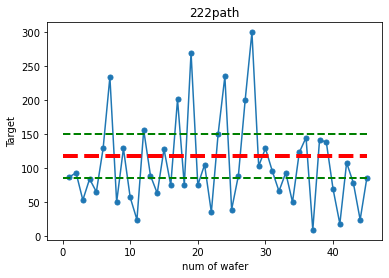

In [135]:
df_temp = df[df['Path'] == 22222]
df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]

plt.plot(df_temp['cnt'], df_temp['Target'],marker = 'o', markersize = 5)
plt.plot([0, len(df_temp)],[ucl, ucl], "--g", linewidth=2)
plt.plot( [0, len(df_temp)],[cl, cl], "--r", linewidth=4)
plt.plot( [0, len(df_temp)],[lcl, lcl], "--g", linewidth=2)
plt.title(str(222) + 'path')
plt.xlabel('num of wafer')
plt.ylabel('Target')

In [131]:
df[df['Path'] == 22222]['Target'].mean()

105.93333333333334

<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
<ipython-input-139-7b3fe227a05f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

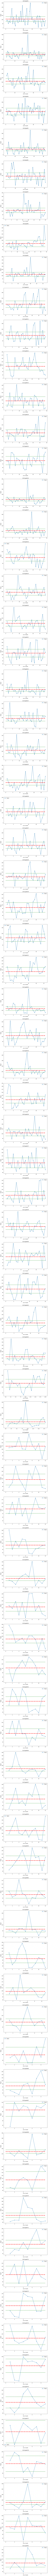

In [139]:
fig = plt.figure(figsize = (10, 600))
i = 1
for path in path_group.index:
    ax = fig.add_subplot(81, 1,i)
    target_mean = df[df['Path'] == path]['Target'].mean()
    import math
    #표준편차 루트C
    target_std = math.sqrt(target_mean)

    #관리 상한(UCL)
    ucl = target_mean + 3*target_std
    cl = target_mean
    lcl = target_mean - 3*target_std
    df_temp = df[df['Path'] == path]
    df_temp['cnt'] = [i for i in range(1,len(df_temp)+1)]
    df_temp.plot(x ='cnt', y = 'Target',marker = 'o', markersize = 5, ax = ax)

    #plt.plot(df_temp['cnt'], df_temp['Target'],marker = 'o', markersize = 5, ax = ax)
    
    plt.plot([0, len(df_temp)],[ucl, ucl], "--g", linewidth=2)
    plt.plot( [0, len(df_temp)],[cl, cl], "--r", linewidth=4)
    plt.plot( [0, len(df_temp)],[lcl, lcl], "--g", linewidth=2)
    plt.title(str(path) + 'path' + str(i))
    i +=1
    plt.xlabel('num of wafer')
    plt.ylabel('Target')

In [140]:
df[df['Target'] >400]

,Unnamed: 0,Unnamed: 0.1,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,...,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path,Defect
897,897,897,NOLSM655257655,3,Oxidation,dry,884.018800,O2,22.41,0.205,...,6.000004e+17,32050.475,103.270,923.0,155,495,[['Random']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,31111,1
898,898,898,NOLSM656258656,3,Oxidation,dry,888.472360,O2,22.36,0.210,...,6.000001e+17,32054.103,103.474,910.0,155,477,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,31122,1
899,899,899,NOLSM657259657,3,Oxidation,dry,876.879474,O2,22.33,0.206,...,5.999990e+17,32044.640,103.707,906.0,156,444,[['Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,31133,1
900,900,900,NOLSM6582510658,3,Oxidation,dry,878.508641,O2,22.32,0.218,...,6.000000e+17,32040.609,102.727,906.0,154,459,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 0 0 0 0 0 ...,31211,1
913,913,913,NOLSM6712523671,3,Oxidation,dry,887.849050,O2,38.02,0.221,...,6.000001e+17,32467.764,104.579,863.0,157,492,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 0 0 0 0 0 ...,31322,1
949,949,949,NOLSM653255,1,Oxidation,dry,874.158980,O2,22.20,0.224,...,6.000004e+17,32045.650,101.340,902.0,152,453,[['Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 0 0 0 0 0 ...,12333,1
951,951,951,NOLSM655257,1,Oxidation,dry,874.873309,O2,22.41,0.227,...,6.000004e+17,32050.475,103.270,923.0,155,495,[['Random']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,13222,1
952,952,952,NOLSM656258,1,Oxidation,dry,874.608725,O2,22.36,0.228,...,6.000001e+17,32054.103,103.474,910.0,155,477,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,13311,1
953,953,953,NOLSM657259,2,Oxidation,dry,875.024212,O2,22.33,0.229,...,5.999990e+17,32044.640,103.707,906.0,156,444,[['Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,21111,1
954,954,954,NOLSM6582510,2,Oxidation,dry,873.801767,O2,22.32,0.226,...,6.000000e+17,32040.609,102.727,906.0,154,459,[['Edge-Loc']],[[0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 0 0 0 0 0 ...,21222,1
